In [1]:
# Import libraries
import numpy as np
print('numpy version\t:', np.__version__)
import pandas as pd
print('pandas version\t:', pd.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
print('seaborn version\t:', sns.__version__)

pd.set_option('display.max_columns', 60)
pd.options.display.float_format = '{:.4f}'.format

import warnings
warnings.filterwarnings("ignore")

numpy version	: 1.18.5
pandas version	: 1.0.5
seaborn version	: 0.10.1


In [2]:
df = pd.read_excel('NBFC Loan Transaction Data.xlsx')
df.head()

,AGREEMENTID,AUTHORIZATIONDATE,BALANCE_EXCESS,BALANCE_TENURE,CITY,COMPLETED_TENURE,CURRENT_INTEREST_RATE,CURRENT_INTEREST_RATE_MAX,CURRENT_INTEREST_RATE_MIN,CURRENT_INTEREST_RATE_CHANGES,CURRENT_TENOR,CUSTOMERID,DIFF_AUTH_INT_DATE,DIFF_CURRENT_INTEREST_RATE_MAX_MIN,DIFF_EMI_AMOUNT_MAX_MIN,DIFF_ORIGINAL_CURRENT_INTEREST_RATE,DIFF_ORIGINAL_CURRENT_TENOR,DPD,DUEDAY,EMI_AMOUNT,EMI_DUEAMT,EMI_OS_AMOUNT,EMI_RECEIVED_AMT,EXCESS_ADJUSTED_AMT,EXCESS_AVAILABLE,FOIR,INTEREST_START_DATE,LAST_RECEIPT_AMOUNT,LAST_RECEIPT_DATE,LATEST_TRANSACTION_MONTH,LOAN_AMT,MAX_EMI_AMOUNT,MIN_EMI_AMOUNT,MONTHOPENING,NET_DISBURSED_AMT,NET_LTV,NET_RECEIVABLE,NUM_EMI_CHANGES,NUM_LOW_FREQ_TRANSACTIONS,ORIGNAL_INTEREST_RATE,ORIGNAL_TENOR,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,PRE_EMI_DUEAMT,PRE_EMI_OS_AMOUNT,PRE_EMI_RECEIVED_AMT,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB,FORECLOSURE
0,11220001,2010-08-29,0.0000,0,MUMBAI,45,13.4219,13.7341,13.4219,1,45,12001000.0000,1,0.3121,916441.0000,-2.8092,75,0,1,83559.0000,8614898.2784,175477.7826,8439420.4958,213586.8554,213586.8554,0.6000,2010-08-30,1000000.0000,2014-05-05,5.0000,11710107.2400,1000000.0000,83559.0000,8693575.3278,11710107.2400,40.0600,175477.7826,1,1,10.6127,120,116447.2281,2725722.8838,11593660.0119,7994.2736,0.0000,7994.2736,HL,10901100.0000,NaN,NaN,45,1
1,11220002,2010-09-15,0.0000,99,MUMBAI,38,13.7341,13.7341,13.7341,0,137,12001001.0000,0,0.0000,0.0000,-3.1214,43,0,1,126530.0000,10619027.2133,279448.0846,10339579.1287,0.0000,0.0000,0.6000,2010-09-15,126530.0000,2013-11-01,11.0000,19290253.3236,126530.0000,126530.0000,17138606.0165,19290253.3236,84.3100,279448.0846,0,0,10.6127,180,12347597.2961,4945153.5911,6942656.0275,100504.5759,0.0000,100504.5759,HL,10901100.0000,NaN,NaN,38,1
2,11220006,2010-11-02,0.0000,231,MUMBAI,81,15.6069,16.2312,15.6069,2,312,12001005.0000,-1,0.6243,477122.0000,-4.0578,-132,0,5,22878.0000,4670210.6849,0.0000,4670210.6849,1179715.7192,1179715.7192,0.7200,2010-11-01,22878.0000,2017-08-05,8.0000,3933394.9960,500000.0000,22878.0000,3744831.4178,3933394.9960,50.8900,0.0000,2,3,11.5491,180,2994183.5178,2990124.0140,939211.4782,5947.6305,0.0000,5947.6305,HL,10901101.0000,NaN,NaN,81,1
3,11220008,2010-10-06,0.0000,0,THANE,91,11.2370,13.7341,11.2370,4,91,12001007.0000,0,2.4971,1434259.0000,-0.6243,89,0,1,65741.0000,13130976.8136,63659.2808,13067317.5329,6770848.4170,6770848.4170,0.6000,2010-10-06,65741.0000,2018-05-02,5.0000,10022587.7064,1500000.0000,65741.0000,5747875.2421,10022587.7064,84.6300,63659.2808,3,8,10.6127,180,42951.2021,4648994.2748,9979636.5043,60322.1808,0.0000,60322.1808,HL,10901100.0000,NaN,NaN,91,1
4,11220010,2010-10-26,0.0000,215,MUMBAI,89,14.9826,15.6069,14.9826,2,304,12001009.0000,0,0.6243,0.0000,-4.0578,-124,0,5,54433.0000,10489232.8208,0.0000,10489232.8208,120218.1110,120218.1110,0.8300,2010-10-26,54433.0000,2018-04-05,4.0000,7755937.3127,54433.0000,54433.0000,7200652.6148,7755937.3127,30.9400,0.0000,0,3,10.9248,180,7200652.6148,6593777.8084,555284.6979,27732.7875,0.0000,27732.7875,HL,10901101.0000,NaN,NaN,90,1


In [3]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 20012 
The number of columns (variables) is 53


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20012 entries, 0 to 20011
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   AGREEMENTID                          20012 non-null  int64         
 1   AUTHORIZATIONDATE                    20012 non-null  datetime64[ns]
 2   BALANCE_EXCESS                       20012 non-null  float64       
 3   BALANCE_TENURE                       20012 non-null  int64         
 4   CITY                                 20012 non-null  object        
 5   COMPLETED_TENURE                     20012 non-null  int64         
 6   CURRENT_INTEREST_RATE                20012 non-null  float64       
 7   CURRENT_INTEREST_RATE_MAX            20012 non-null  float64       
 8   CURRENT_INTEREST_RATE_MIN            20012 non-null  float64       
 9   CURRENT_INTEREST_RATE_CHANGES        20012 non-null  int64         
 10  CURRENT_TE

In [5]:
df.dtypes.value_counts()


float64           32
int64             14
object             4
datetime64[ns]     3
dtype: int64

In [6]:
dup_rows = df.duplicated()

In [7]:
df.drop_duplicates(inplace=True)
df.shape
print('Number of duplicate rows = %d' % (dup_rows.sum()))
print(df.shape)

Number of duplicate rows = 0
(20012, 53)


In [8]:
null = df.columns[df.isnull().any()]
df[null].isnull().sum()

CUSTOMERID                    281
DIFF_EMI_AMOUNT_MAX_MIN        89
LAST_RECEIPT_AMOUNT           247
LAST_RECEIPT_DATE              75
LATEST_TRANSACTION_MONTH       75
MAX_EMI_AMOUNT                 89
MIN_EMI_AMOUNT                 89
SCHEMEID                      281
NPA_IN_LAST_MONTH           19893
NPA_IN_CURRENT_MONTH        19893
dtype: int64

In [9]:
df[null].isnull().sum().sum()

41012

In [10]:
df[null].isnull().sum().sum()

41012

In [11]:
Null_Perc = round(df[null].isnull().sum()/len(df)*100,2)
Null_Perc

CUSTOMERID                  1.4000
DIFF_EMI_AMOUNT_MAX_MIN     0.4400
LAST_RECEIPT_AMOUNT         1.2300
LAST_RECEIPT_DATE           0.3700
LATEST_TRANSACTION_MONTH    0.3700
MAX_EMI_AMOUNT              0.4400
MIN_EMI_AMOUNT              0.4400
SCHEMEID                    1.4000
NPA_IN_LAST_MONTH          99.4100
NPA_IN_CURRENT_MONTH       99.4100
dtype: float64

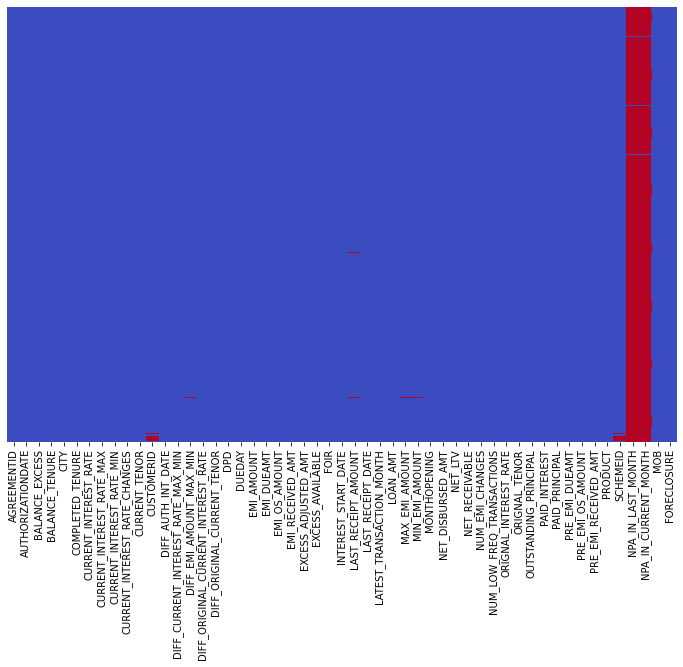

In [12]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [13]:
df1 = df.drop('CUSTOMERID', axis = 1) 
# Customer Id has few missing values and the data is unique at a agremment id level,
# which will not help in foreclosure prediction, which can be dropped.

In [14]:
df1 = df1.drop('SCHEMEID', axis = 1) 
# Scheme Id has few missing values and the data has no extra information, 
# which will not help in foreclosure prediction, which can be dropped.

In [15]:
df1 = df1.drop('MOB', axis = 1) 
# MOB is an internal code and the data has no extra information, 
# which will not help in foreclosure prediction, which can be dropped.

In [16]:
pd.crosstab(df.NPA_IN_LAST_MONTH, df.FORECLOSURE,  margins=True)
# NPA_IN_LAST_MONTH variable has 99.41 misssing values and only 2 Foreclosure's of 15 NPA's, which is not a good predictor.
# So will drop this variable.

FORECLOSURE,0,1,All
NPA_IN_LAST_MONTH,,,
0,69,33,102
#N/,2,0,2
Yes,13,2,15
All,84,35,119


In [17]:
df1 = df1.drop('NPA_IN_LAST_MONTH', axis = 1) 

In [18]:
pd.crosstab(df.NPA_IN_CURRENT_MONTH, df.FORECLOSURE,  margins=True)
# NPA_IN_CURRENT_MONTH variable has 99.41 misssing values and only 2 Foreclosure's of 16 NPA's, which is not a good predictor.
# So will drop this variable.

FORECLOSURE,0,1,All
NPA_IN_CURRENT_MONTH,,,
0,70,33,103
Yes,14,2,16
All,84,35,119


In [19]:
df1 = df1.drop('NPA_IN_CURRENT_MONTH', axis = 1) 

In [20]:
df1['MIN_EMI_AMOUNT'].describe()

count     19923.0000
mean       7045.0255
std       43425.4883
min           0.0100
25%         118.0000
50%         133.1800
75%        3334.0000
max     3156965.0000
Name: MIN_EMI_AMOUNT, dtype: float64

In [21]:
median = df1['MIN_EMI_AMOUNT'].median()
df1['MIN_EMI_AMOUNT'].fillna(value=median,inplace=True)

In [22]:
df1['MIN_EMI_AMOUNT'].describe()

count     20012.0000
mean       7014.2862
std       43331.2530
min           0.0100
25%         118.0000
50%         133.1800
75%        3299.2500
max     3156965.0000
Name: MIN_EMI_AMOUNT, dtype: float64

In [23]:
df1['MAX_EMI_AMOUNT'].describe()

count      19923.0000
mean      122254.4415
std       970451.5905
min           13.3400
25%        13318.0000
50%        23600.0000
75%        49360.5000
max     84968811.9000
Name: MAX_EMI_AMOUNT, dtype: float64

In [24]:
median = df1['MAX_EMI_AMOUNT'].median()
df1['MAX_EMI_AMOUNT'].fillna(value=median,inplace=True)

In [25]:
df1['MAX_EMI_AMOUNT'].describe()

count      20012.0000
mean      121815.6924
std       968313.3702
min           13.3400
25%        13352.0000
50%        23600.0000
75%        49220.5000
max     84968811.9000
Name: MAX_EMI_AMOUNT, dtype: float64

In [26]:
df1['DIFF_EMI_AMOUNT_MAX_MIN'].describe()

count      19923.0000
mean      115209.4159
std       967082.4406
min            0.0000
25%        10207.0000
50%        19885.0000
75%        42466.4850
max     84968249.9000
Name: DIFF_EMI_AMOUNT_MAX_MIN, dtype: float64

In [27]:
median = df1['DIFF_EMI_AMOUNT_MAX_MIN'].median()
df1['DIFF_EMI_AMOUNT_MAX_MIN'].fillna(value=median,inplace=True)

In [28]:
df1['DIFF_EMI_AMOUNT_MAX_MIN'].describe()

count      20012.0000
mean      114785.4766
std       964950.3164
min            0.0000
25%        10253.0000
50%        19885.0000
75%        42242.5000
max     84968249.9000
Name: DIFF_EMI_AMOUNT_MAX_MIN, dtype: float64

In [29]:
df1['LATEST_TRANSACTION_MONTH'].describe()

count   19937.0000
mean       10.6922
std         2.8214
min         1.0000
25%        12.0000
50%        12.0000
75%        12.0000
max        12.0000
Name: LATEST_TRANSACTION_MONTH, dtype: float64

In [30]:
median = df1['LATEST_TRANSACTION_MONTH'].median()
df1['LATEST_TRANSACTION_MONTH'].fillna(value=median,inplace=True)

In [31]:
df1['LATEST_TRANSACTION_MONTH'].describe()

count   20012.0000
mean       10.6971
std         2.8173
min         1.0000
25%        12.0000
50%        12.0000
75%        12.0000
max        12.0000
Name: LATEST_TRANSACTION_MONTH, dtype: float64

In [32]:
df1['LAST_RECEIPT_AMOUNT'].describe()

count      19765.0000
mean       80674.4580
std       808402.6951
min            1.0000
25%        11061.0000
50%        19642.0000
75%        38219.0000
max     84968811.9000
Name: LAST_RECEIPT_AMOUNT, dtype: float64

In [33]:
median = df1['LAST_RECEIPT_AMOUNT'].median()
df1['LAST_RECEIPT_AMOUNT'].fillna(value=median,inplace=True)

In [34]:
df1['LAST_RECEIPT_AMOUNT'].describe()

count      20012.0000
mean       79921.1591
std       803426.3223
min            1.0000
25%        11167.0000
50%        19642.0000
75%        37848.2500
max     84968811.9000
Name: LAST_RECEIPT_AMOUNT, dtype: float64

In [35]:
df1['LAST_RECEIPT_DATE'].describe()

count                   19937
unique                    721
top       2018-12-05 00:00:00
freq                    11512
first     2013-10-10 00:00:00
last      2019-01-01 00:00:00
Name: LAST_RECEIPT_DATE, dtype: object

In [36]:
mode = df1['LAST_RECEIPT_DATE'].mode()
df1['LAST_RECEIPT_DATE'].fillna(value='mode',inplace=True)

In [37]:
df1['LAST_RECEIPT_DATE'].describe()

count                   20012
unique                    722
top       2018-12-05 00:00:00
freq                    11512
Name: LAST_RECEIPT_DATE, dtype: object

In [38]:
df1.isnull().sum().sum()

0

In [39]:
Null_Perc_final = round(df1.isnull().sum()/len(df1)*100,2)
Null_Perc_final

AGREEMENTID                           0.0000
AUTHORIZATIONDATE                     0.0000
BALANCE_EXCESS                        0.0000
BALANCE_TENURE                        0.0000
CITY                                  0.0000
COMPLETED_TENURE                      0.0000
CURRENT_INTEREST_RATE                 0.0000
CURRENT_INTEREST_RATE_MAX             0.0000
CURRENT_INTEREST_RATE_MIN             0.0000
CURRENT_INTEREST_RATE_CHANGES         0.0000
CURRENT_TENOR                         0.0000
DIFF_AUTH_INT_DATE                    0.0000
DIFF_CURRENT_INTEREST_RATE_MAX_MIN    0.0000
DIFF_EMI_AMOUNT_MAX_MIN               0.0000
DIFF_ORIGINAL_CURRENT_INTEREST_RATE   0.0000
DIFF_ORIGINAL_CURRENT_TENOR           0.0000
DPD                                   0.0000
DUEDAY                                0.0000
EMI_AMOUNT                            0.0000
EMI_DUEAMT                            0.0000
EMI_OS_AMOUNT                         0.0000
EMI_RECEIVED_AMT                      0.0000
EXCESS_ADJ

In [40]:
df1.columns

Index(['AGREEMENTID', 'AUTHORIZATIONDATE', 'BALANCE_EXCESS', 'BALANCE_TENURE',
       'CITY', 'COMPLETED_TENURE', 'CURRENT_INTEREST_RATE',
       'CURRENT_INTEREST_RATE_MAX', 'CURRENT_INTEREST_RATE_MIN',
       'CURRENT_INTEREST_RATE_CHANGES', 'CURRENT_TENOR', 'DIFF_AUTH_INT_DATE',
       'DIFF_CURRENT_INTEREST_RATE_MAX_MIN', 'DIFF_EMI_AMOUNT_MAX_MIN',
       'DIFF_ORIGINAL_CURRENT_INTEREST_RATE', 'DIFF_ORIGINAL_CURRENT_TENOR',
       'DPD', 'DUEDAY', 'EMI_AMOUNT', 'EMI_DUEAMT', 'EMI_OS_AMOUNT',
       'EMI_RECEIVED_AMT', 'EXCESS_ADJUSTED_AMT', 'EXCESS_AVAILABLE', 'FOIR',
       'INTEREST_START_DATE', 'LAST_RECEIPT_AMOUNT', 'LAST_RECEIPT_DATE',
       'LATEST_TRANSACTION_MONTH', 'LOAN_AMT', 'MAX_EMI_AMOUNT',
       'MIN_EMI_AMOUNT', 'MONTHOPENING', 'NET_DISBURSED_AMT', 'NET_LTV',
       'NET_RECEIVABLE', 'NUM_EMI_CHANGES', 'NUM_LOW_FREQ_TRANSACTIONS',
       'ORIGNAL_INTEREST_RATE', 'ORIGNAL_TENOR', 'OUTSTANDING_PRINCIPAL',
       'PAID_INTEREST', 'PAID_PRINCIPAL', 'PRE_EMI_DUEAMT',
  

In [41]:
test_vars_all = ['AGREEMENTID', 'AUTHORIZATIONDATE', 'BALANCE_EXCESS', 'BALANCE_TENURE',
       'CITY', 'COMPLETED_TENURE', 'CURRENT_INTEREST_RATE',
       'CURRENT_INTEREST_RATE_MAX', 'CURRENT_INTEREST_RATE_MIN',
       'CURRENT_INTEREST_RATE_CHANGES', 'CURRENT_TENOR', 'DIFF_AUTH_INT_DATE',
       'DIFF_CURRENT_INTEREST_RATE_MAX_MIN', 'DIFF_EMI_AMOUNT_MAX_MIN',
       'DIFF_ORIGINAL_CURRENT_INTEREST_RATE', 'DIFF_ORIGINAL_CURRENT_TENOR',
       'DPD', 'DUEDAY', 'EMI_AMOUNT', 'EMI_DUEAMT', 'EMI_OS_AMOUNT',
       'EMI_RECEIVED_AMT', 'EXCESS_ADJUSTED_AMT', 'EXCESS_AVAILABLE', 'FOIR',
       'INTEREST_START_DATE', 'LAST_RECEIPT_AMOUNT', 'LAST_RECEIPT_DATE',
       'LATEST_TRANSACTION_MONTH', 'LOAN_AMT', 'MAX_EMI_AMOUNT',
       'MIN_EMI_AMOUNT', 'MONTHOPENING', 'NET_DISBURSED_AMT', 'NET_LTV',
       'NET_RECEIVABLE', 'NUM_EMI_CHANGES', 'NUM_LOW_FREQ_TRANSACTIONS',
       'ORIGNAL_INTEREST_RATE', 'ORIGNAL_TENOR', 'OUTSTANDING_PRINCIPAL',
       'PAID_INTEREST', 'PAID_PRINCIPAL', 'PRE_EMI_DUEAMT',
       'PRE_EMI_OS_AMOUNT', 'PRE_EMI_RECEIVED_AMT', 'PRODUCT', 'FORECLOSURE']


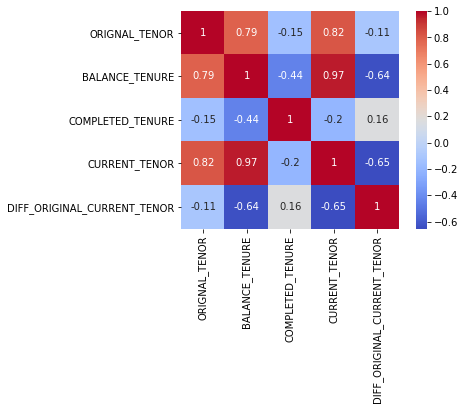

In [42]:
df2=df1.copy()
test_tenor = ['ORIGNAL_TENOR', 'BALANCE_TENURE','COMPLETED_TENURE','CURRENT_TENOR', 'DIFF_ORIGINAL_CURRENT_TENOR']
df2=df2[test_tenor]
sns.heatmap(df2.corr(), annot=True,cmap='coolwarm',square=True)

# Insights: From the below correlation graph, Original Tenor, Balance Tenor and Current Tenor are highly correlated, 
# Balance Tenor will be retained along with Completed Tenor , with domain understanding  
# dropping Original Tenor, Current Tenor & difference betwn original and current tenor

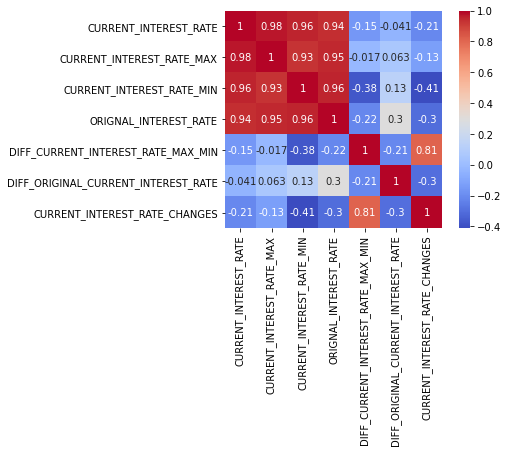

In [43]:
df2=df1.copy()
test_IntRate =['CURRENT_INTEREST_RATE','CURRENT_INTEREST_RATE_MAX','CURRENT_INTEREST_RATE_MIN','ORIGNAL_INTEREST_RATE','DIFF_CURRENT_INTEREST_RATE_MAX_MIN','DIFF_ORIGINAL_CURRENT_INTEREST_RATE','CURRENT_INTEREST_RATE_CHANGES']
df2=df2[test_IntRate]
sns.heatmap(df2.corr(), annot=True,cmap='coolwarm',square=True)

#Insights1: Current Interest rate is highly correlated with other version of available interest rates(Max, Min & Original), Current Interest rate will be retained, others dropped.
#Insights2: Difference between Current max and Current min & Difference between Origianl and Current Interest Rate & Current interst rate changes dropped as no insights derived from it. 


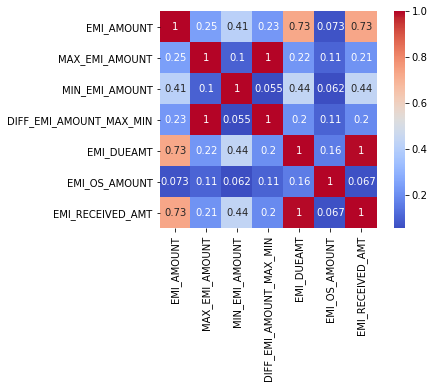

In [44]:
df2=df1.copy()
test_emiamt =['EMI_AMOUNT','MAX_EMI_AMOUNT','MIN_EMI_AMOUNT','DIFF_EMI_AMOUNT_MAX_MIN','EMI_DUEAMT','EMI_OS_AMOUNT','EMI_RECEIVED_AMT']
df2=df2[test_emiamt]
sns.heatmap(df2.corr(), annot=True,cmap='coolwarm',square=True)

#Insights1: EMI Amount and Outstanding EMI amount and Received amount are more intuitive to use when compared to other variation of EMI variables
# rest other variables dropped.

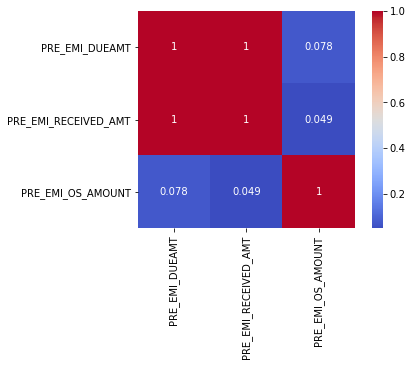

In [45]:
df2=df1.copy()
test_pre_emiamt =['PRE_EMI_DUEAMT','PRE_EMI_RECEIVED_AMT','PRE_EMI_OS_AMOUNT']
df2=df2[test_pre_emiamt]
sns.heatmap(df2.corr(), annot=True,cmap='coolwarm',square=True)

#Insights: Pre-EMI Due amount & Pre EMI Received Amount are perfectly highly correlated, in the context of foreclosure the 'pre emi due amount' will be retained along with 'Pre Emi OS amount'

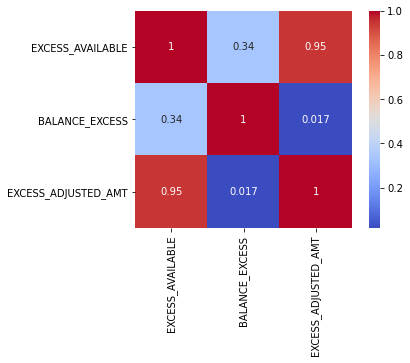

In [46]:
df2=df1.copy()
test_excess_amt =['EXCESS_AVAILABLE','BALANCE_EXCESS','EXCESS_ADJUSTED_AMT']
df2=df2[test_excess_amt]
sns.heatmap(df2.corr(), annot=True,cmap='coolwarm',square=True)

#Insight: Excess Available and Excess Adjusted Amount are highly correlated, 'Excess Available' will be retained along with 'Balance Excess'

In [47]:
#Dropping un-necessary columns after correlation heat map charts & Columns which dont provide much information on Target variable.

Drop_variables = ['AUTHORIZATIONDATE','DIFF_AUTH_INT_DATE','DUEDAY','ORIGNAL_TENOR','CURRENT_TENOR','DIFF_ORIGINAL_CURRENT_TENOR','ORIGNAL_INTEREST_RATE','DIFF_ORIGINAL_CURRENT_INTEREST_RATE','CURRENT_INTEREST_RATE_MAX','CURRENT_INTEREST_RATE_MIN','DIFF_CURRENT_INTEREST_RATE_MAX_MIN','CURRENT_INTEREST_RATE_CHANGES','MAX_EMI_AMOUNT','MIN_EMI_AMOUNT','DIFF_EMI_AMOUNT_MAX_MIN','EMI_DUEAMT','PRE_EMI_RECEIVED_AMT','EXCESS_ADJUSTED_AMT','LATEST_TRANSACTION_MONTH','LAST_RECEIPT_DATE','LAST_RECEIPT_AMOUNT','MONTHOPENING']
df3 = df1.copy()
df3.drop(columns=Drop_variables,inplace=True)
print('After Correlation checks',df1.shape[1], 'variables are reduced to', df3.shape[1],'variables')


After Correlation checks 48 variables are reduced to 26 variables


In [48]:
df3.columns

Index(['AGREEMENTID', 'BALANCE_EXCESS', 'BALANCE_TENURE', 'CITY',
       'COMPLETED_TENURE', 'CURRENT_INTEREST_RATE', 'DPD', 'EMI_AMOUNT',
       'EMI_OS_AMOUNT', 'EMI_RECEIVED_AMT', 'EXCESS_AVAILABLE', 'FOIR',
       'INTEREST_START_DATE', 'LOAN_AMT', 'NET_DISBURSED_AMT', 'NET_LTV',
       'NET_RECEIVABLE', 'NUM_EMI_CHANGES', 'NUM_LOW_FREQ_TRANSACTIONS',
       'OUTSTANDING_PRINCIPAL', 'PAID_INTEREST', 'PAID_PRINCIPAL',
       'PRE_EMI_DUEAMT', 'PRE_EMI_OS_AMOUNT', 'PRODUCT', 'FORECLOSURE'],
      dtype='object')

In [49]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20012 entries, 0 to 20011
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   AGREEMENTID                20012 non-null  int64         
 1   BALANCE_EXCESS             20012 non-null  float64       
 2   BALANCE_TENURE             20012 non-null  int64         
 3   CITY                       20012 non-null  object        
 4   COMPLETED_TENURE           20012 non-null  int64         
 5   CURRENT_INTEREST_RATE      20012 non-null  float64       
 6   DPD                        20012 non-null  int64         
 7   EMI_AMOUNT                 20012 non-null  float64       
 8   EMI_OS_AMOUNT              20012 non-null  float64       
 9   EMI_RECEIVED_AMT           20012 non-null  float64       
 10  EXCESS_AVAILABLE           20012 non-null  float64       
 11  FOIR                       20012 non-null  float64       
 12  INTE

In [50]:
cat_var = ['CITY','INTEREST_START_DATE','PRODUCT']
df4 = df3.copy()
df4.drop(columns=cat_var,inplace=True)

In [51]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20012 entries, 0 to 20011
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AGREEMENTID                20012 non-null  int64  
 1   BALANCE_EXCESS             20012 non-null  float64
 2   BALANCE_TENURE             20012 non-null  int64  
 3   COMPLETED_TENURE           20012 non-null  int64  
 4   CURRENT_INTEREST_RATE      20012 non-null  float64
 5   DPD                        20012 non-null  int64  
 6   EMI_AMOUNT                 20012 non-null  float64
 7   EMI_OS_AMOUNT              20012 non-null  float64
 8   EMI_RECEIVED_AMT           20012 non-null  float64
 9   EXCESS_AVAILABLE           20012 non-null  float64
 10  FOIR                       20012 non-null  float64
 11  LOAN_AMT                   20012 non-null  float64
 12  NET_DISBURSED_AMT          20012 non-null  float64
 13  NET_LTV                    20012 non-null  flo

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [53]:
df4 = df4.drop('PRE_EMI_OS_AMOUNT', axis = 1)
calc_vif(df4).sort_values(by = 'VIF', ascending = False)

,variables,VIF
1,BALANCE_EXCESS,15714.5709
14,NET_RECEIVABLE,15657.2811
7,EMI_OS_AMOUNT,3704.7931
12,NET_DISBURSED_AMT,1357.5171
17,OUTSTANDING_PRINCIPAL,867.4918
11,LOAN_AMT,323.8924
8,EMI_RECEIVED_AMT,164.5269
0,AGREEMENTID,88.3374
18,PAID_INTEREST,87.6198
4,CURRENT_INTEREST_RATE,47.7414


In [54]:
df4 = df4.drop('BALANCE_EXCESS', axis = 1)
calc_vif(df4).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,NET_DISBURSED_AMT,1356.5062
16,OUTSTANDING_PRINCIPAL,865.4589
10,LOAN_AMT,323.7861
7,EMI_RECEIVED_AMT,163.8979
0,AGREEMENTID,88.3353
17,PAID_INTEREST,87.2480
3,CURRENT_INTEREST_RATE,47.7370
8,EXCESS_AVAILABLE,44.1745
1,BALANCE_TENURE,12.7670
5,EMI_AMOUNT,11.7088


In [55]:
df4 = df4.drop('NET_DISBURSED_AMT', axis = 1)
calc_vif(df4).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,LOAN_AMT,252.6829
15,OUTSTANDING_PRINCIPAL,223.0673
0,AGREEMENTID,88.3317
7,EMI_RECEIVED_AMT,62.5771
3,CURRENT_INTEREST_RATE,47.7359
16,PAID_INTEREST,41.4990
1,BALANCE_TENURE,12.7670
8,EXCESS_AVAILABLE,12.5170
5,EMI_AMOUNT,11.6896
11,NET_LTV,8.0324


In [56]:
df4 = df4.drop('LOAN_AMT', axis = 1)
calc_vif(df4).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,AGREEMENTID,88.2845
3,CURRENT_INTEREST_RATE,47.7347
7,EMI_RECEIVED_AMT,24.4935
15,PAID_INTEREST,23.2567
1,BALANCE_TENURE,12.7423
5,EMI_AMOUNT,11.1783
14,OUTSTANDING_PRINCIPAL,8.4852
10,NET_LTV,8.0297
13,NUM_LOW_FREQ_TRANSACTIONS,6.0930
12,NUM_EMI_CHANGES,4.8761


In [57]:
df4 = df4.drop('AGREEMENTID', axis = 1)
calc_vif(df4).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,EMI_RECEIVED_AMT,23.9519
14,PAID_INTEREST,22.4846
4,EMI_AMOUNT,11.1371
2,CURRENT_INTEREST_RATE,11.0045
0,BALANCE_TENURE,8.7083
13,OUTSTANDING_PRINCIPAL,8.3245
9,NET_LTV,6.7664
12,NUM_LOW_FREQ_TRANSACTIONS,6.0929
11,NUM_EMI_CHANGES,4.8752
1,COMPLETED_TENURE,4.0027


In [58]:
df4 = df4.drop('EMI_RECEIVED_AMT', axis = 1)
calc_vif(df4).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,CURRENT_INTEREST_RATE,10.9674
0,BALANCE_TENURE,8.6576
4,EMI_AMOUNT,7.1200
8,NET_LTV,6.7404
11,NUM_LOW_FREQ_TRANSACTIONS,6.0921
12,OUTSTANDING_PRINCIPAL,5.8386
10,NUM_EMI_CHANGES,4.8733
1,COMPLETED_TENURE,3.9872
13,PAID_INTEREST,2.8400
15,PRE_EMI_DUEAMT,2.1021


In [59]:
df4 = df4.drop('CURRENT_INTEREST_RATE', axis = 1)
calc_vif(df4).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,EMI_AMOUNT,6.9679
7,NET_LTV,6.3742
10,NUM_LOW_FREQ_TRANSACTIONS,6.0913
0,BALANCE_TENURE,5.8443
11,OUTSTANDING_PRINCIPAL,5.8186
9,NUM_EMI_CHANGES,4.7140
1,COMPLETED_TENURE,3.2839
12,PAID_INTEREST,2.7939
14,PRE_EMI_DUEAMT,2.1021
5,EXCESS_AVAILABLE,2.0673


In [60]:
df4 = df4.drop('EMI_AMOUNT', axis = 1)
calc_vif(df4).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,NET_LTV,6.3567
9,NUM_LOW_FREQ_TRANSACTIONS,6.0907
0,BALANCE_TENURE,5.7708
8,NUM_EMI_CHANGES,4.7048
1,COMPLETED_TENURE,3.2807
11,PAID_INTEREST,2.2765
13,PRE_EMI_DUEAMT,2.0941
10,OUTSTANDING_PRINCIPAL,2.0876
12,PAID_PRINCIPAL,2.0579
4,EXCESS_AVAILABLE,1.8934


In [61]:
df4 = df4.drop('NET_LTV', axis = 1)
calc_vif(df4).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,NUM_LOW_FREQ_TRANSACTIONS,6.0888
7,NUM_EMI_CHANGES,4.6680
1,COMPLETED_TENURE,3.2012
10,PAID_INTEREST,2.2765
0,BALANCE_TENURE,2.1130
12,PRE_EMI_DUEAMT,2.0929
9,OUTSTANDING_PRINCIPAL,2.0744
11,PAID_PRINCIPAL,2.0576
4,EXCESS_AVAILABLE,1.8820
2,DPD,1.6638


In [62]:
df4 = df4.drop('NUM_LOW_FREQ_TRANSACTIONS', axis = 1)
calc_vif(df4).sort_values(by = 'VIF', ascending = False)

,variables,VIF
1,COMPLETED_TENURE,2.5744
7,NUM_EMI_CHANGES,2.4403
9,PAID_INTEREST,2.2720
0,BALANCE_TENURE,2.1057
11,PRE_EMI_DUEAMT,2.0887
8,OUTSTANDING_PRINCIPAL,2.0731
10,PAID_PRINCIPAL,2.0575
4,EXCESS_AVAILABLE,1.8810
3,EMI_OS_AMOUNT,1.6284
2,DPD,1.5743


In [63]:
df4.shape

(20012, 13)

In [64]:
df4.columns

Index(['BALANCE_TENURE', 'COMPLETED_TENURE', 'DPD', 'EMI_OS_AMOUNT',
       'EXCESS_AVAILABLE', 'FOIR', 'NET_RECEIVABLE', 'NUM_EMI_CHANGES',
       'OUTSTANDING_PRINCIPAL', 'PAID_INTEREST', 'PAID_PRINCIPAL',
       'PRE_EMI_DUEAMT', 'FORECLOSURE'],
      dtype='object')

In [65]:
df4.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE_TENURE,20012.0000,172.8246,64.0045,0.0000,136.0000,174.0000,216.0000,674.0000
COMPLETED_TENURE,20012.0000,17.2691,16.4863,0.0000,6.0000,12.0000,25.0000,98.0000
DPD,20012.0000,7.5741,66.0989,0.0000,0.0000,0.0000,0.0000,2054.0000
EMI_OS_AMOUNT,20012.0000,33297.3485,656131.1347,0.0000,0.0000,0.0000,0.0000,58995308.7953
EXCESS_AVAILABLE,20012.0000,438896.1929,4169759.3531,0.0000,0.0000,260.6091,3105.0088,284164207.0655
FOIR,20012.0000,27.9600,3871.0648,-170.3300,0.4100,0.5200,0.6800,547616.0000
NET_RECEIVABLE,20012.0000,-45439.1533,1348502.3128,-75345537.7245,-17.6684,0.0000,0.0000,38643502.1153
NUM_EMI_CHANGES,20012.0000,2.9498,2.6355,-1.0000,2.0000,2.0000,4.0000,33.0000
OUTSTANDING_PRINCIPAL,20012.0000,5212982.4025,11521352.5645,-0.7506,1428919.4555,2394655.3775,4551203.7397,381836715.3048
PAID_INTEREST,20012.0000,989054.6886,3026052.5285,0.0000,125331.9266,309724.8300,795467.9601,123036220.6464


In [66]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,2

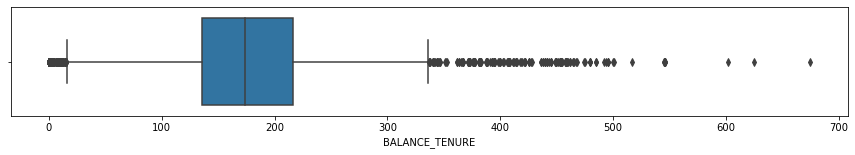

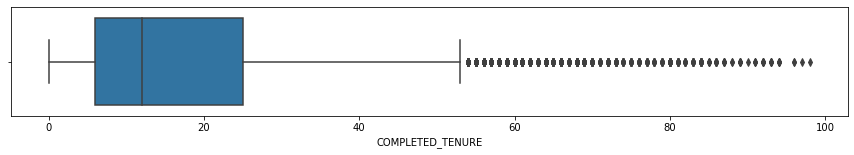

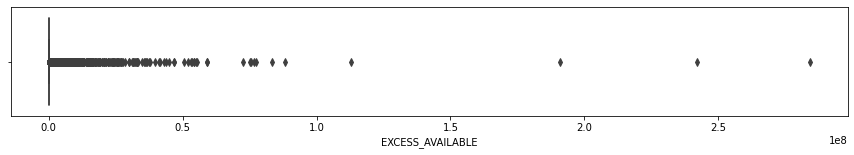

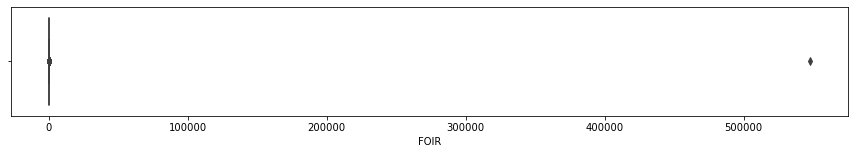

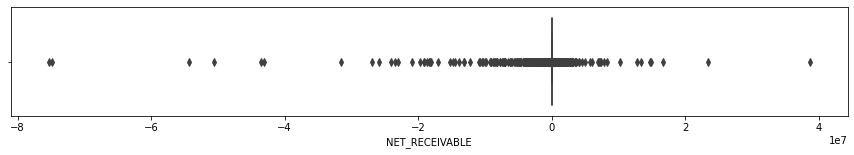

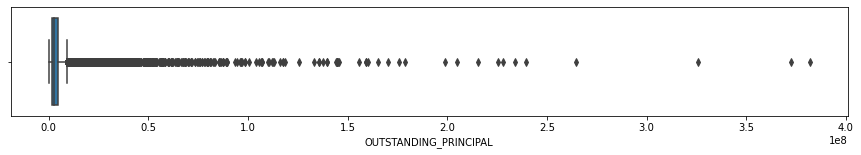

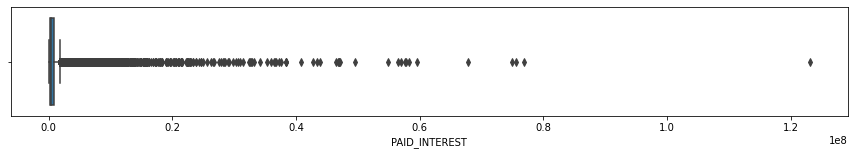

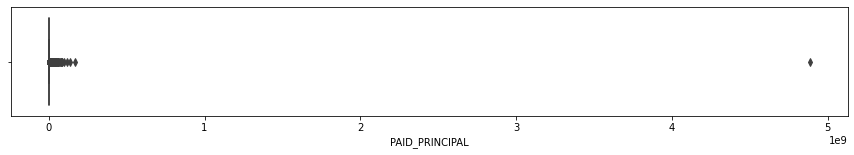

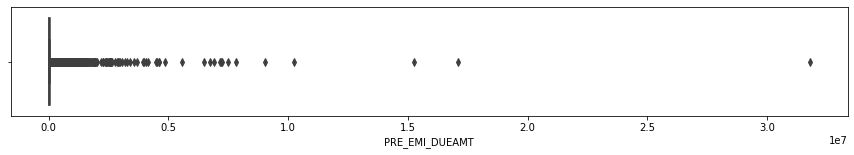

In [67]:
cols=['BALANCE_TENURE', 'COMPLETED_TENURE','EXCESS_AVAILABLE', 'FOIR', 'NET_RECEIVABLE','OUTSTANDING_PRINCIPAL', 'PAID_INTEREST', 'PAID_PRINCIPAL',
       'PRE_EMI_DUEAMT'];

for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [68]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [69]:
cols=['BALANCE_TENURE', 'COMPLETED_TENURE', 
       'EXCESS_AVAILABLE', 'FOIR', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_INTEREST', 'PAID_PRINCIPAL',
       'PRE_EMI_DUEAMT']
for column in cols:
    lr,ur=remove_outlier(df4[column])
    df4[column]=np.where(df4[column]>ur,ur,df4[column])
    df4[column]=np.where(df4[column]<lr,lr,df4[column])   

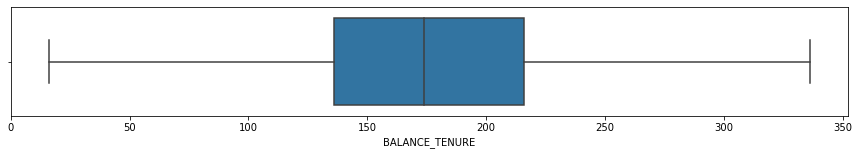

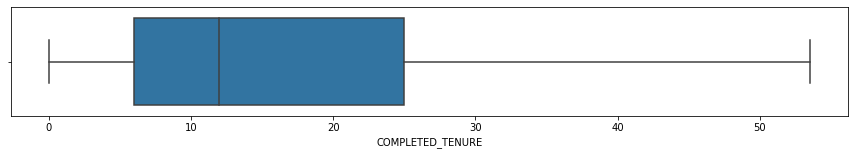

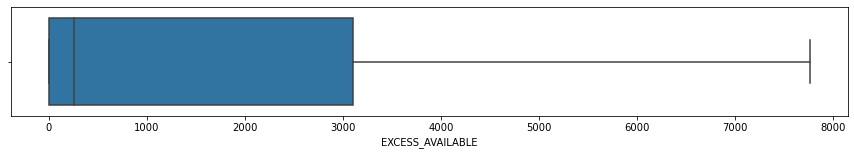

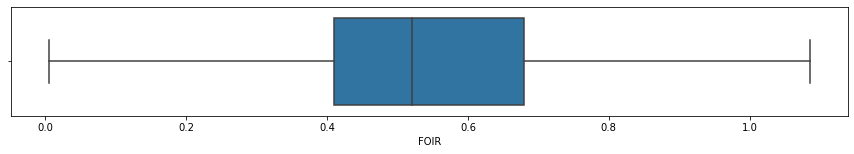

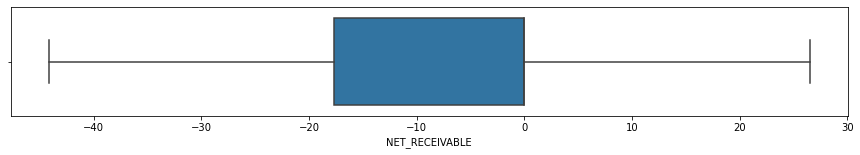

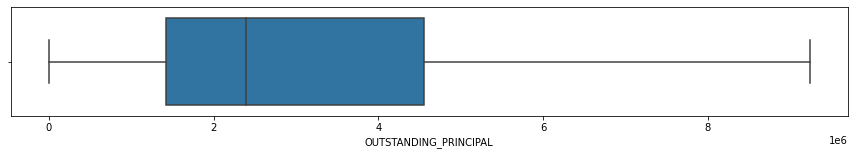

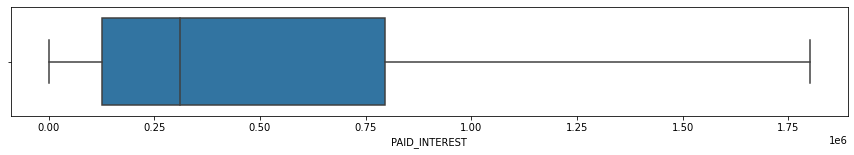

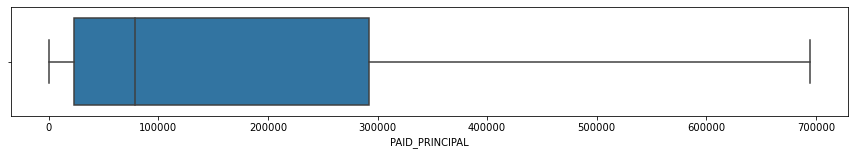

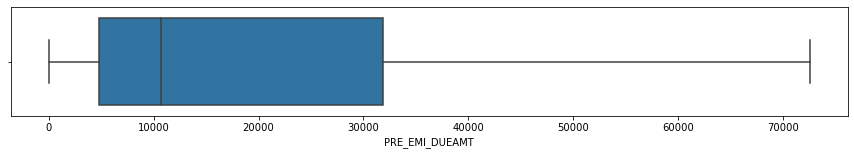

In [70]:
cols=['BALANCE_TENURE', 'COMPLETED_TENURE','EXCESS_AVAILABLE', 'FOIR', 'NET_RECEIVABLE','OUTSTANDING_PRINCIPAL', 'PAID_INTEREST', 'PAID_PRINCIPAL',
       'PRE_EMI_DUEAMT'];

for i in cols:
    sns.boxplot(df4[i])
    plt.show()

In [71]:
#Derived Variables for these 3 variables
# 'DPD', 'EMI_OS_AMOUNT', 'NUM_EMI_CHANGES'

# DPD
bins = [0, 1, 30, 60, 90, 10000000]
slot = ['0-1','1-30','30-60','60-90','90 and above']
df4['DPD_RANGE'] = pd.cut(df4['DPD'], bins, labels=slot, include_lowest=True)
#print(df4['DPD_RANGE'].value_counts(dropna=False))
print(pd.crosstab(df4.DPD_RANGE, df4.FORECLOSURE,  margins=True))

#EMI_OS_AMT
bins = [0, 10000, 50000, 300000, 100000000000000]
slot = ['0-10k','10k-50k','50k-300K','300k and above']
df4['EMI_OSAMT_RANGE'] = pd.cut(df4['EMI_OS_AMOUNT'], bins, labels=slot, include_lowest=True)
#print(df4['EMI_OSAMT_RANGE'].value_counts(dropna=False))
print(pd.crosstab(df4.EMI_OSAMT_RANGE, df4.FORECLOSURE,  margins=True))

#NUM_EMI_CHANGES
bins = [-5, 2, 5,100]
slot = ['-5-2#','2-5#','5 and above']
df4['NUM_EMI_CHANGES_RANGE'] = pd.cut(df4['NUM_EMI_CHANGES'], bins, labels=slot, include_lowest=True)
#print(df4['NUM_EMI_CHANGES_RANGE'].value_counts(dropna=False))
print(pd.crosstab(df4.NUM_EMI_CHANGES_RANGE, df4.FORECLOSURE,  margins=True))

FORECLOSURE       0     1    All
DPD_RANGE                       
0-1           17113  1657  18770
1-30            546    59    605
30-60           217    22    239
60-90           148    26    174
90 and above    193    31    224
All           18217  1795  20012
FORECLOSURE          0     1    All
EMI_OSAMT_RANGE                    
0-10k            17153  1623  18776
10k-50k            346    62    408
50k-300K           492    79    571
300k and above     226    31    257
All              18217  1795  20012
FORECLOSURE                0     1    All
NUM_EMI_CHANGES_RANGE                    
-5-2#                  10880   916  11796
2-5#                    5276   583   5859
5 and above             2061   296   2357
All                    18217  1795  20012


In [72]:
df4.shape

(20012, 16)

In [73]:
col =['DPD', 'EMI_OS_AMOUNT', 'NUM_EMI_CHANGES']
df4 = df4.drop(col, axis = 1)

In [74]:
df4.shape

(20012, 13)

In [75]:
df4.describe().include='all'
df4.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,...,19982,19983,19984,19985,19986,19987,19988,19989,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999,20000,20001,20002,20003,20004,20005,20006,20007,20008,20009,20010,20011
BALANCE_TENURE,16.0000,99.0000,231.0000,16.0000,215.0000,137.0000,294.0000,276.0000,145.0000,291.0000,16.0000,16.0000,16.0000,247.0000,128.0000,113.0000,111.0000,152.0000,118.0000,149.0000,295.0000,303.0000,274.0000,116.0000,284.0000,53.0000,132.0000,134.0000,227.0000,16.0000,...,240.0000,240.0000,240.0000,192.0000,240.0000,240.0000,240.0000,300.0000,180.0000,240.0000,180.0000,216.0000,240.0000,144.0000,180.0000,180.0000,132.0000,240.0000,240.0000,142.0000,180.0000,180.0000,180.0000,180.0000,228.0000,240.0000,240.0000,96.0000,60.0000,120.0000
COMPLETED_TENURE,45.0000,38.0000,53.5000,53.5000,53.5000,53.5000,53.5000,52.0000,53.5000,53.5000,49.0000,53.5000,53.5000,53.5000,53.5000,53.5000,53.5000,53.5000,53.5000,45.0000,53.5000,53.5000,41.0000,53.5000,53.5000,53.5000,35.0000,53.5000,46.0000,41.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
EXCESS_AVAILABLE,7762.5219,0.0000,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,7762.5219,0.0000,0.0000,7762.5219,7762.5219,0.0000,0.0000,2.2086,7762.5219,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4417,0.4417,0.4417,0.4417,0.8834,0.4417,0.4417,0.4417,0.4417,0.0000,35.3368,0.0000,0.0000,0.0000,0.0000,0.0000
FOIR,0.6000,0.6000,0.7200,0.6000,0.8300,0.6000,0.5500,0.6000,0.6000,0.6000,1.0600,0.5000,0.6000,0.6000,0.8900,0.6800,0.9000,0.9400,0.9400,0.5000,0.6000,0.8700,0.7500,0.4300,0.9088,0.5200,0.5200,0.6800,0.5600,0.2600,...,0.4100,0.4600,1.0200,0.4100,0.4800,0.5000,0.9800,0.5200,0.7100,0.5200,0.5400,0.5500,0.5400,0.7200,0.7300,0.6800,0.5000,0.8900,0.5500,0.8800,0.5800,0.4300,1.0850,0.5900,0.7400,0.8900,0.5600,0.6400,0.5400,0.2700
NET_RECEIVABLE,26.5026,26.5026,0.0000,26.5026,0.0000,26.5026,26.5026,26.5026,26.5026,26.5026,-1.6564,0.0000,0.0000,-0.4417,-0.7951,-44.1710,-0.0221,26.5026,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,26.5026,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.4417,-0.4417,-0.4417,-0.4417,-0.8834,-0.4417,26.5026,-0.4417,-0.4417,0.0000,-35.3368,0.0000,0.0000,0.0000,0.0000,0.0000
OUTSTANDING_PRINCIPAL,116447.2281,9234630.1661,2994183.5178,42951.2021,7200652.6148,769138.6097,5765533.2731,9234630.1661,928407.3279,890255.0629,144595.1431,135634.4640,-0.7506,2081217.7228,3043444.0506,6509594.7182,923960.5198,9234630.1661,9234630.1661,4337875.0863,7571028.4140,6646556.1024,9234630.1661,6433638.4137,9234630.1661,9234630.1661,9234630.1661,6513752.6470,5112739.4130,7510.8177,...,9234630.1661,791666.3038,6755831.1000,1992375.6614,4593965.1480,3753239.5000,9234630.1661,5224507.8827,2161865.9520,3002591.6000,442882.2610,4503887.4000,2221917.7840,4503887.4000,9234630.1661,7220159.3715,1824024.8542,7779761.3758,7506479.0000,7159160.2219,2176878.9100,2672644.3156,9234630.1661,7374800.3454,4744094.7280,9234630.1661,2299950.6358,9234630.1661,9234630.1661,9234630.1661
PAID_INTEREST,1800672.0104,1800672.0104,1800672.0104,1800672.0104,1800672.0104,727393.5787,1800672.0104,1800672.0104,1800672.0104,980662.1802,1800672.0104,1800672.0104,1694234.0941,1166067.3172,1800672.0104,1800672.0104,1391330.4166,1800672.0104,1800672.0104,1800672.0104,1800672.0104,1800672.0104,1800672.0104,1800672.0104,1800672.0104,1800672.0104,1800672.0104,1800672.0104,1800672.0104,1800672.0104,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,32635.1681,0.00

In [76]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20012 entries, 0 to 20011
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   BALANCE_TENURE         20012 non-null  float64 
 1   COMPLETED_TENURE       20012 non-null  float64 
 2   EXCESS_AVAILABLE       20012 non-null  float64 
 3   FOIR                   20012 non-null  float64 
 4   NET_RECEIVABLE         20012 non-null  float64 
 5   OUTSTANDING_PRINCIPAL  20012 non-null  float64 
 6   PAID_INTEREST          20012 non-null  float64 
 7   PAID_PRINCIPAL         20012 non-null  float64 
 8   PRE_EMI_DUEAMT         20012 non-null  float64 
 9   FORECLOSURE            20012 non-null  int64   
 10  DPD_RANGE              20012 non-null  category
 11  EMI_OSAMT_RANGE        20012 non-null  category
 12  NUM_EMI_CHANGES_RANGE  20012 non-null  category
dtypes: category(3), float64(9), int64(1)
memory usage: 2.4 MB


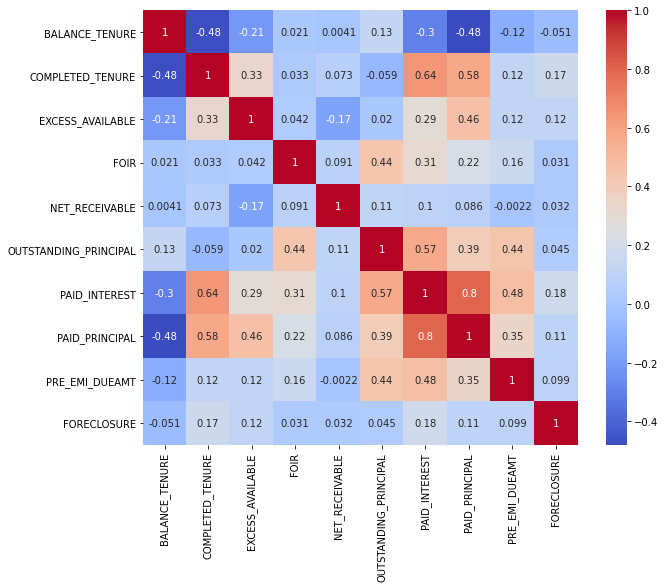

In [77]:
plt.figure(figsize=(10,8))  
sns.heatmap(df4.corr(), annot=True,cmap='coolwarm',square=True)

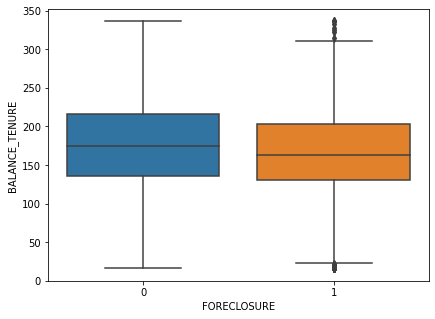

In [78]:
#Bivariate Analysis of final column variables vs Foreclosure Variable
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df4['FORECLOSURE'], df4['BALANCE_TENURE'])

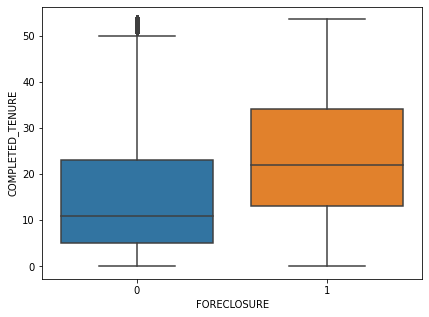

In [79]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df4['FORECLOSURE'], df4['COMPLETED_TENURE'])

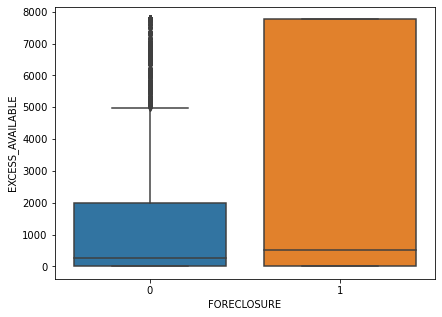

In [80]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df4['FORECLOSURE'], df4['EXCESS_AVAILABLE'])

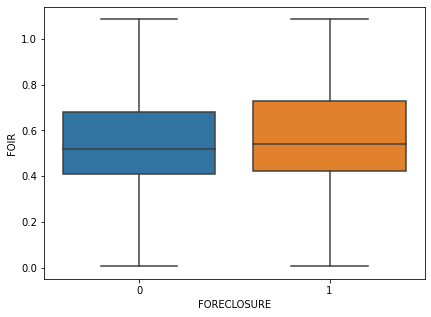

In [81]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df4['FORECLOSURE'], df4['FOIR'])

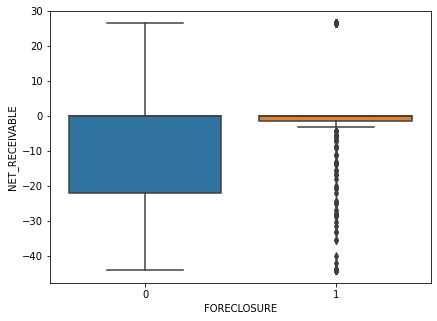

In [82]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df4['FORECLOSURE'], df4['NET_RECEIVABLE'])

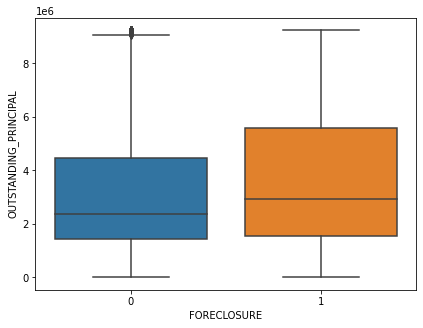

In [83]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df4['FORECLOSURE'], df4['OUTSTANDING_PRINCIPAL'])

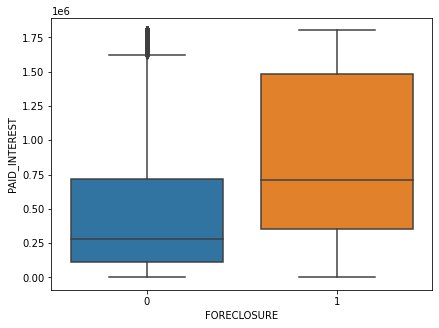

In [84]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df4['FORECLOSURE'], df4['PAID_INTEREST'])

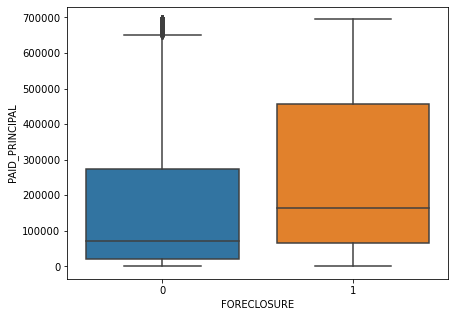

In [85]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df4['FORECLOSURE'], df4['PAID_PRINCIPAL'])

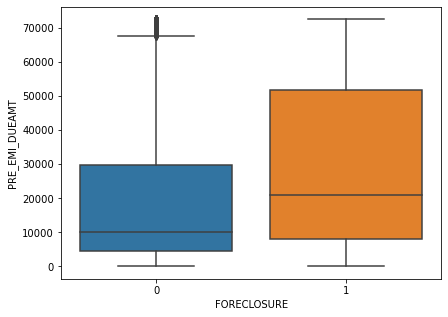

In [86]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df4['FORECLOSURE'], df4['PRE_EMI_DUEAMT'])

In [87]:
#Final Variables for modelling
df5=df4.copy()
# final_vars=['COMPLETED_TENURE','NUM_EMI_CHANGES','PAID_INTEREST','BALANCE_TENURE','PRE_EMI_DUEAMT','OUTSTANDING_PRINCIPAL','PAID_PRINCIPAL','EXCESS_AVAILABLE','EMI_OS_AMOUNT','DPD','NET_RECEIVABLE','FOIR','FORECLOSURE']
# df5=df5[final_vars]
print(df5.shape)

(20012, 13)


In [88]:
df5.dtypes

BALANCE_TENURE            float64
COMPLETED_TENURE          float64
EXCESS_AVAILABLE          float64
FOIR                      float64
NET_RECEIVABLE            float64
OUTSTANDING_PRINCIPAL     float64
PAID_INTEREST             float64
PAID_PRINCIPAL            float64
PRE_EMI_DUEAMT            float64
FORECLOSURE                 int64
DPD_RANGE                category
EMI_OSAMT_RANGE          category
NUM_EMI_CHANGES_RANGE    category
dtype: object

In [89]:
#Hot encoding
'''
Converting all Category Dtypes to integers using CAT.codes
'''
df5['DPD_RANGE_CAT'] = df5['DPD_RANGE'].cat.codes
print(df5['DPD_RANGE_CAT'].value_counts())
df5['EMI_OSAMT_RANGE_CAT'] = df5['EMI_OSAMT_RANGE'].cat.codes
print(df5['EMI_OSAMT_RANGE_CAT'].value_counts())
df5['NUM_EMI_CHANGES_RANGE_CAT'] = df5['NUM_EMI_CHANGES_RANGE'].cat.codes
print(df5['NUM_EMI_CHANGES_RANGE_CAT'].value_counts())


0    18770
1      605
2      239
4      224
3      174
Name: DPD_RANGE_CAT, dtype: int64
0    18776
2      571
1      408
3      257
Name: EMI_OSAMT_RANGE_CAT, dtype: int64
0    11796
1     5859
2     2357
Name: NUM_EMI_CHANGES_RANGE_CAT, dtype: int64


In [90]:
print(df5.shape)
df5=df5.drop(columns=['DPD_RANGE','EMI_OSAMT_RANGE','NUM_EMI_CHANGES_RANGE'],axis=1)
print(df5.shape)

(20012, 16)
(20012, 13)


In [92]:
#Clustering

df5.shape

(20012, 13)

In [93]:
df6=df5.copy()

In [103]:
'''
Creating Dendrogram to know the required number of clusters
'''

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [104]:
'''Create a Linkage Method from Single/Complete/Average/Ward or Centroid'''

link_method = linkage(df5,method='average')

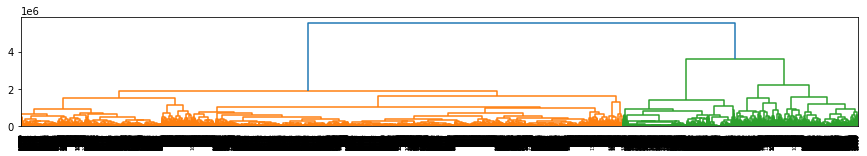

In [105]:
'''Create a dendrogram'''
d=dendrogram(link_method)

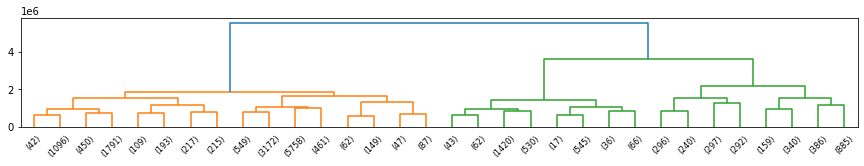

In [106]:
'''Cutting the dendogram'''
d=dendrogram(link_method,truncate_mode='level', p=4)

In [107]:
'''Creating fcluster using fcluster module'''
clusters = fcluster(link_method,4,criterion='maxclust')
clusters

array([1, 2, 1, ..., 2, 2, 2], dtype=int32)

In [108]:
'''Merging Cluster name back to the original dataset'''
df5['Agg_Cname_NoScaling'] = clusters
df5

,BALANCE_TENURE,COMPLETED_TENURE,EXCESS_AVAILABLE,FOIR,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,PRE_EMI_DUEAMT,FORECLOSURE,DPD_RANGE_CAT,EMI_OSAMT_RANGE_CAT,NUM_EMI_CHANGES_RANGE_CAT,Agg_Cname_NoScaling
0,16.0000,45.0000,7762.5219,0.6000,26.5026,116447.2281,1800672.0104,694324.9114,7994.2736,1,0,2,0,1
1,99.0000,38.0000,0.0000,0.6000,26.5026,9234630.1661,1800672.0104,694324.9114,72544.5836,1,0,2,0,2
2,231.0000,53.5000,7762.5219,0.7200,0.0000,2994183.5178,1800672.0104,694324.9114,5947.6305,1,0,0,0,1
3,16.0000,53.5000,7762.5219,0.6000,26.5026,42951.2021,1800672.0104,694324.9114,60322.1808,1,0,2,1,1
4,215.0000,53.5000,7762.5219,0.8300,0.0000,7200652.6148,1800672.0104,555284.6979,27732.7875,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20007,240.0000,0.0000,0.0000,0.8900,0.0000,9234630.1661,13813.4227,0.0000,20320.8870,0,0,0,0,2
20008,240.0000,0.0000,0.0000,0.5600,0.0000,2299950.6358,0.0000,0.0000,0.0000,0,0,0,0,1
20009,96.0000,0.0000,0.0000,0.6400,0.0000,9234630.1661,0.0000,0.0000,0.0000,0,0,0,0,2
20010,60.0000,0.0000,0.0000,0.5400,0.0000,9234630.1661,0.0000,0.0000,0.0000,0,0,0,0,2


In [110]:
'''K-Means Clustering'''
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 4)
k_means.fit(df5)
labels = k_means.labels_
labels

array([3, 0, 1, ..., 0, 0, 0])

In [111]:
'''WSS(within cluster sum of squares) - Scree Plot'''
k_means = KMeans(n_clusters = 1)
k_means.fit(df5)
k_means.inertia_

1.6133009239818848e+17

In [112]:
k_means = KMeans(n_clusters = 2)
k_means.fit(df5)
k_means.inertia_

3.5756752386658e+16

In [113]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df5)
k_means.inertia_

1.8396045531064428e+16

In [114]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df5)
k_means.inertia_

1.2460999411739312e+16

In [115]:
wss=[]
for i in range(1,11):
    KM=KMeans(n_clusters=i)
    KM.fit(df5)
    wss.append(KM.inertia_)
wss

[1.6133009239818848e+17,
 3.575677822521065e+16,
 1.839595226087359e+16,
 1.2461028023630506e+16,
 9564584048095654.0,
 8238768504910058.0,
 7211933304243226.0,
 6199081611020981.0,
 5383379407987406.0,
 4798238614142883.0]

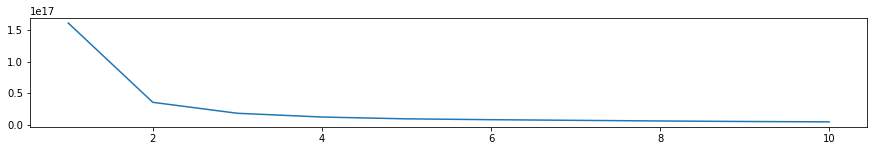

In [116]:
plt.plot(range(1,11),wss)

In [ ]:
'''Creating Silhoeutte score for 4 clusters'''
k_means = KMeans(n_clusters = 4)
k_means.fit(df5)
labels = k_means.labels_
from sklearn.metrics import silhouette_samples,silhouette_score
silhouette_score(df5,labels)

In [ ]:
# 3 clusters are final clusters, the silhouette score reduced for cluster
df5['Kmean_Clustername'] = labels
df5.head()

In [94]:
'''Scaling data and Checking Dendrogram'''
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scaler = MinMaxScaler()
scaler = StandardScaler()

In [95]:
df6_scaled = pd.DataFrame(scaler.fit_transform(df6), columns=df6.columns)


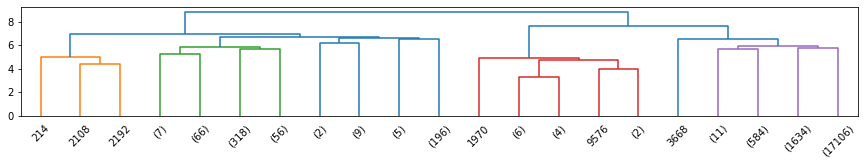

In [96]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
link_method = linkage(df6_scaled,method='average')
d=dendrogram(link_method,truncate_mode='level', p=4)
clusters = fcluster(link_method,4,criterion='maxclust')
df6_scaled['Agg_Cname_afterScaling'] = clusters

In [98]:
'''K-Means Clustering'''
from sklearn.cluster import KMeans

In [99]:
'''WSS(within cluster sum of squares) - Scree Plot'''
k_means = KMeans(n_clusters = 1)
k_means.fit(df6_scaled)
k_means.inertia_

262743.1398660813

In [100]:
k_means = KMeans(n_clusters = 2)
k_means.fit(df6_scaled)
k_means.inertia_

210553.88996639443

In [101]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df6_scaled)
k_means.inertia_

176960.2084355325

In [102]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df6_scaled)
k_means.inertia_

158397.97556645842

In [103]:
k_means = KMeans(n_clusters = 5)
k_means.fit(df6_scaled)
k_means.inertia_

145069.8197643964

In [104]:
wss=[]
for i in range(1,11):
    KM=KMeans(n_clusters=i)
    KM.fit(df6_scaled)
    wss.append(KM.inertia_)
wss

[262743.13986608124,
 210553.98193253833,
 176960.15930203316,
 158398.04537058593,
 145070.32398546138,
 135364.5947668224,
 127229.82915943465,
 120242.25530448368,
 114610.22023738034,
 109884.5854514852]

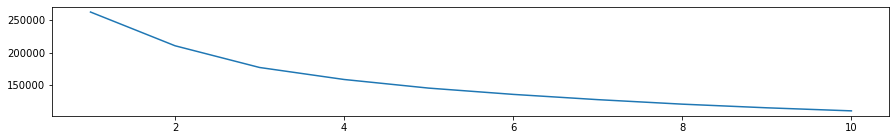

In [105]:
plt.plot(range(1,11),wss)